**Realizando a importação das bibliotecas necessárias**

**KMeans** --> algoritmo de cluster

**make_blobs** --> geração de massa teste

**pyplot** --> geração (plotagem) dos gráficos

**pandas** --> usado para exibir uma tabela

In [ ]:
import numpy as np
from math import sqrt
from matplotlib import pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
import pandas as pd

**Definição dos valores especificados pelo exercício**

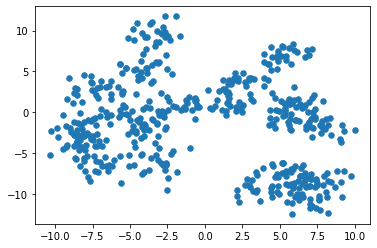

In [ ]:
X, y = make_blobs(n_samples=500, centers=20, random_state=999)
plt.scatter(X[:,0], X[:,1], s=30)

**Gerando um vetor com as distâncias quadráticas com n clusters**

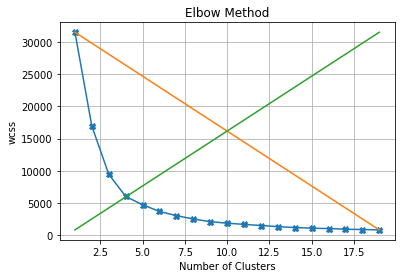

,wcss
1,31547.372471
2,16949.214472
3,9464.847251
4,6005.101775
5,4717.404092
6,3662.640329
7,3018.164819
8,2490.737137
9,2078.035703
10,1841.535196


In [ ]:
wcss= []
for i in range(1,20):
   kmeans = KMeans(n_clusters=i, init ='k-means++', max_iter= 300, n_init=10)
   kmeans.fit(X)
   wcss.append(kmeans.inertia_)

plt.plot(range(1,20),wcss, marker='X')
plt.plot([1, 19],[wcss[0], wcss[len(wcss)-1]])
plt.plot([1,19], [wcss[len(wcss)-1], wcss[0]])
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('wcss')
plt.grid()
plt.show()

pd.DataFrame(wcss,  range(1,20), columns=['wcss']) #monta a tabela

**Definir qual é com exatidão nosso número de clusters**

In [ ]:
def optimal_number_of_clusters(wcss):
    x1, y1 = 1, wcss[0]
    x2, y2 = 20, wcss[len(wcss)-1]

    distances = []
    for i in range(len(wcss)):
        x0 = i+2
        y0 = wcss[i]
        numerator = abs((y2-y1)*x0 - (x2-x1)*y0 + x2*y1 - y2*x1)
        denominator = sqrt((y2 - y1)**2 + (x2 - x1)**2)
        distances.append(numerator/denominator)
    return distances.index(max(distances)) + 1

n = optimal_number_of_clusters(wcss)
print (n)

4


**Realizando o processamento (clusterização) com o número de clusters obtido a partir do método de elbow**

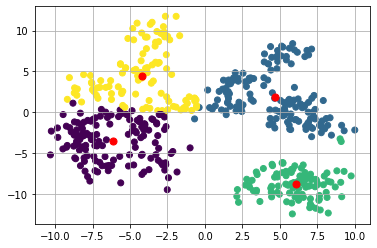

In [ ]:
kmeans = KMeans(n_clusters=4, init ='k-means++', max_iter= 300, n_init=10)
pred_y = kmeans.fit_predict(X)

plt.scatter(X[:,0], X[:,1], c= pred_y )
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], s=50, c='red')
plt.grid()
plt.show()

**Pergunta**

Considere o dataset gerado a partir das instruções do enunciado. Caso o algoritmo seja executado buscando apenas **1 cluster**, qual será a **soma dos quadrados intra-clusters (wcss)** ao final da execução?

In [ ]:
kmeans = KMeans(n_clusters=1, init ='k-means++', max_iter= 300, n_init=101)
kmeans.fit(X)
kmeans.inertia_

31547.372471390485

**Pergunta**

Considere o dataset gerado a partir das instruções do enunciado. Caso o algoritmo seja executado buscando **5 cluster**, qual será a **soma dos quadrados intra-clusters (wcss)** ao final da execução?

In [ ]:
kmeans = KMeans(n_clusters=5, init ='k-means++', max_iter= 300, n_init=101)
kmeans.fit(X)
kmeans.inertia_

4717.404091931214

**Pergunta**

Considere o dataset gerado a partir das instruções do enunciado. Caso o algoritmo K-Means seja executado buscando apenas **1 cluster**, qual será a **coordenada do centroide ao final** da execução?

In [ ]:
kmeans = KMeans(n_clusters=1, init ='k-means++', max_iter= 300, n_init=101)
 
result = kmeans.fit(X);
centers = kmeans.cluster_centers_
 
centers

array([[ 0.02618523, -1.30384304]])